# Analise Exploratória de Dados

Este Notebook terá as seguinte função:

* Identificar as relações entre os dados com a sobrevivência do passageiro;

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
dataset = pd.read_csv('../datasets/train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Dicionário do dataset

1. PassengerID: O ID do passageiro;
2. Survived: Se o passageiro sobreviveu;
3. Pcass: Classe do Ticket;
4. Name: Nome do passageiro;
5. Sex: Sexo do Passageiro;
6. Age: Idade;
7. SibSp: Número de irmãos / conjugues;
8. Parch: Número de pais/ Filhos;
9. Ticket: Número do Ticket;
10. fare: Tarifa do passageiro;
11. Cabin: Cabine do Passageiro;
12. Embarked: Classe do Embarque

## Demonstrando relações entre os dados

### Verificando Taxa de Sobrevivência

In [41]:
dataset['Survived'].replace(to_replace=[0,1], value=['não', 'sim'], inplace=True)

<Axes: xlabel='Survived', ylabel='Count'>

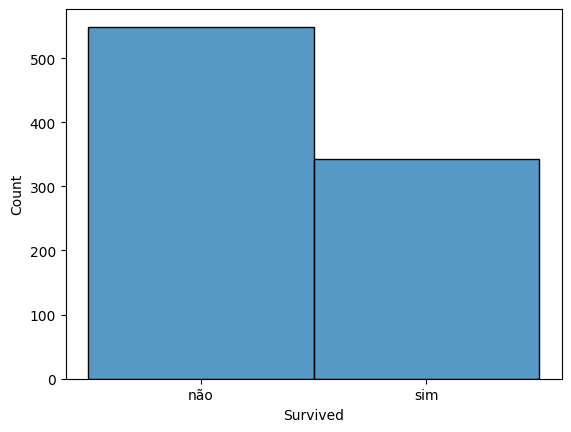

In [42]:
sns.histplot(dataset['Survived'])

### Verificando a relação da Classe social

<Axes: xlabel='Pclass', ylabel='Count'>

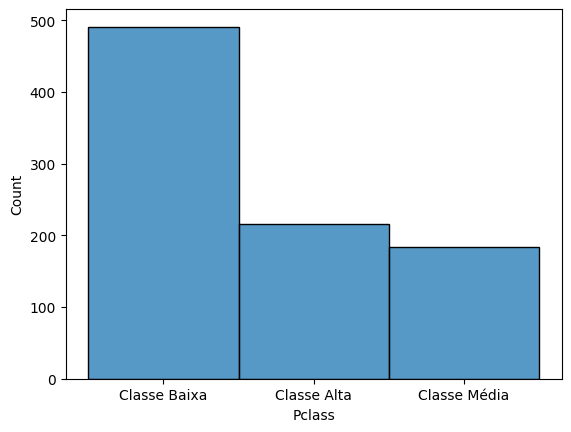

In [43]:
dataset['Pclass'].replace(to_replace=[1,2,3],
                          value=['Classe Alta', 'Classe Média', 'Classe Baixa'],
                          inplace=True)
sns.histplot(dataset['Pclass'])

In [58]:
sobrevivencia_classe = dataset.groupby(['Pclass', 'Survived']).Survived.agg([len]).reset_index()
sobrevivencia_classe

,Pclass,Survived,len
0,Classe Alta,não,80
1,Classe Alta,sim,136
2,Classe Baixa,não,372
3,Classe Baixa,sim,119
4,Classe Média,não,97
5,Classe Média,sim,87


Text(0.5, 0, 'Classe Social')

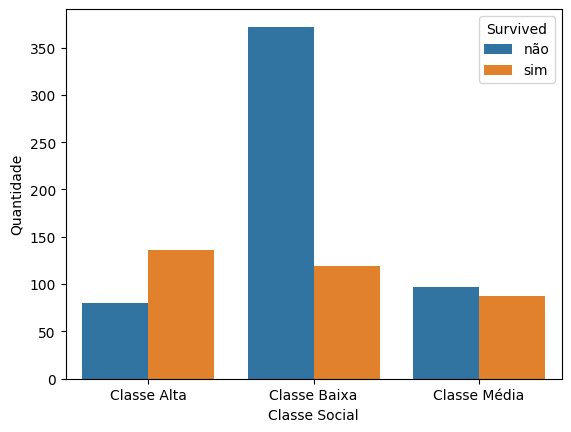

In [62]:
sns.barplot(data=sobrevivencia_classe,
            x='Pclass',
            y='len',
            hue='Survived')

plt.ylabel('Quantidade')
plt.xlabel('Classe Social')

Percentualmente, a classe social vai importar:
* Classe Alta: 63%;
* Classe Baixa: 24%;
* Classe Média: 47%.

### Verificando a relação da idade com as atuais relações

In [71]:
def definir_faixa_etaria(idade: float) -> str:
    if idade == np.nan:
        return 'Idade não identificada'
    elif 12 >= idade >= 0:
        return 'Criança'
    elif 21 >= idade > 12:
        return 'Adolescente'
    elif 60 >= idade > 21:
        return 'Adulto'
    return 'Idoso'

dataset['Age'] = pd.Series(
    map(definir_faixa_etaria, dataset['Age'])
)

dataset['Age'].unique()

array(['Adulto', 'Idoso', 'Criança', 'Adolescente'], dtype=object)

In [72]:
sobrevivencia_classe_idade = dataset.groupby(
    ['Pclass', 'Survived', 'Age']
    ).Survived.agg([len]).reset_index()

sobrevivencia_classe_idade

,Pclass,Survived,Age,len
0,Classe Alta,não,Adolescente,4
1,Classe Alta,não,Adulto,48
2,Classe Alta,não,Criança,1
3,Classe Alta,não,Idoso,27
4,Classe Alta,sim,Adolescente,16
5,Classe Alta,sim,Adulto,100
6,Classe Alta,sim,Criança,3
7,Classe Alta,sim,Idoso,17
8,Classe Baixa,não,Adolescente,72
9,Classe Baixa,não,Adulto,166


In [75]:
classe_alta = sobrevivencia_classe_idade[
    sobrevivencia_classe_idade['Pclass'] == 'Classe Alta'
    ]
classe_baixa = sobrevivencia_classe_idade[
    sobrevivencia_classe_idade['Pclass'] == 'Classe Baixa'
    ]
classe_media = sobrevivencia_classe_idade[
    sobrevivencia_classe_idade['Pclass'] == 'Classe Média'
    ]

Text(0.5, 1.0, 'Classe Média')

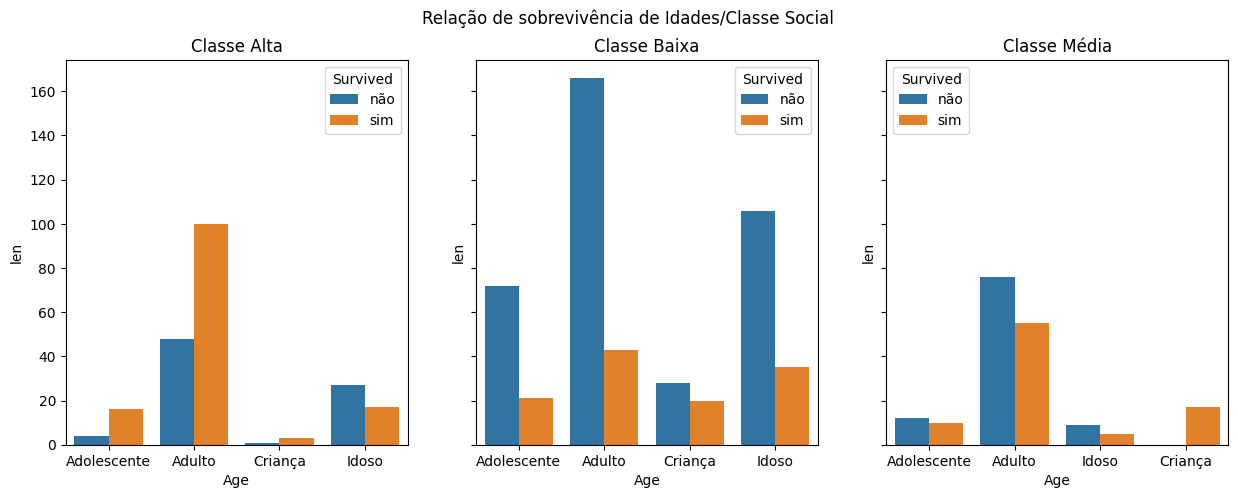

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Relação de sobrevivência de Idades/Classe Social')

sns.barplot(ax=axes[0], 
            data=classe_alta,
            x='Age',
            y='len',
            hue='Survived')
axes[0].set_title('Classe Alta')

sns.barplot(ax=axes[1], 
            data=classe_baixa,
            x='Age',
            y='len',
            hue='Survived')
axes[1].set_title('Classe Baixa')

sns.barplot(ax=axes[2], 
            data=classe_media,
            x='Age',
            y='len',
            hue='Survived')
axes[2].set_title('Classe Média')

A idade deverá ser levada em consideração quando classificado a sobrevivência, note que a classe Social determina bastante a sobrevivência em porcentagem, mas a idade também significa bastante:
* Criança de Clase Alta: 75%;
* Criança de Classe Baixa: 41%;
* Criança de Classe Média: 100% (Todas as crianças sobreviveram)